## Práctica 3

### 1 VISUALIZAMOS EL DATASET LOAD_DIGITS

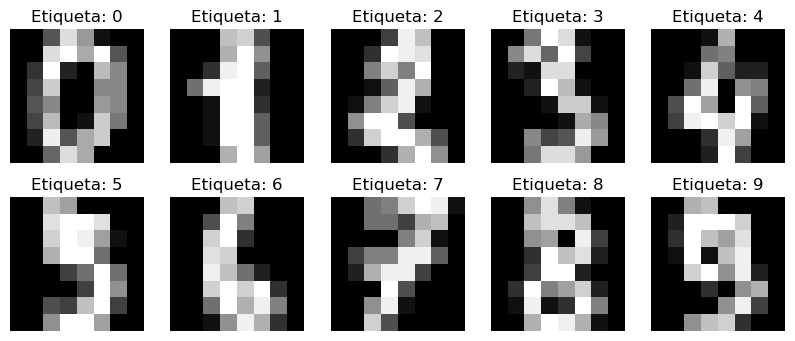

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Cargar el dataset
digits = load_digits()

# Obtener las imágenes y las etiquetas
X = digits.images
y = digits.target

# Mostrar algunas de ellas
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X[i], cmap='gray')
    axes[i].set_title(f'Etiqueta: {y[i]}')
    axes[i].axis('off')

plt.show()


### APARTADO A

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# Cargar nuesto dataset 
digits = load_digits()
X, y = digits.data, digits.target

# Lo dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos un escalado a las características de las imágenes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configuración 1: SVM con kernel lineal
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred_linear = svm_linear.predict(X_test_scaled)

# Calculamos  la precision del clasificador con kernel lineal
precision_lineal = accuracy_score(y_test, y_pred_linear)

# Configuración 2: SVM con kernel RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)

# Realizamos nuevas predicciones en el conjunto de prueba
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Calculamos la precisión del clasificador con kernel RBF
precision_rbf = accuracy_score(y_test, y_pred_rbf)

# Tabla de resultados
print("Configuración\t Precisión")
print("SVM con kernel lineal\t {:.2f}".format(precision_lineal))
print("SVM con kernel RBF\t {:.2f}".format(precision_rbf))

Configuración	 Precisión
SVM con kernel lineal	 0.97
SVM con kernel RBF	 0.98


En este ejemplo, creamos dos configuraciones diferentes de clasificadores SVM, que son  kernels lineal y RBF, respectivamente. Luego, entrenamos los modelos en el conjunto de entrenamiento y realizamos la predicción en el conjunto de prueba. Calculamos la precisión de la clasificación utilizando la función accuracy_score de la libería scikit-learn y creamos una tabla.

### Modificacion hiperparámetros modelo 1

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definimos el clasificador SVM
svm = SVC()

# Nuestros nuevos valores de hiperparámetros a probar
param_n = {'kernel': ['linear', 'rbf'],
              'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1]}

# Búsqueda con GridSearchCV
grid_search = GridSearchCV(svm, param_n, cv=5)
grid_search.fit(X_train, y_train)

# Obtenemos el mejor modelo junto a su precisión
mej_svm = grid_search.best_estimator_
precision1 = mej_svm.score(X_test, y_test)


### Modificación modelo 2

Vamos a modificar los hiperparametros como en el 1 para ver como evoluciona el resultado

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definimos el clasificador SVM
svm = SVC()

# Redefinimos los nuevos hiperparámetros
param_grid = {'kernel': ['linear', 'rbf'],
              'C': [0.01, 0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 10]}

# Búsqueda con GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtenemos el mejor modelo junto a su precisión
mej_svm = grid_search.best_estimator_
precision2 = mej_svm.score(X_test, y_test)


In [5]:
import pandas as pd

# Crearemos una tabla 
datos = pd.DataFrame({'Configuración': ['Configuración 1', 'Configuración 2'],
                        'Precisión': [precision1, precision2]})



### Hacemos la tabla

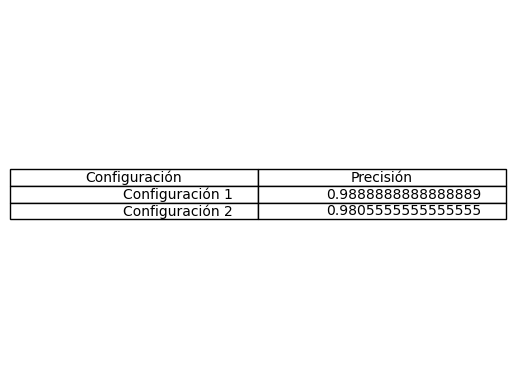

In [6]:

fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=datos.values, colLabels=datos.columns, loc='center')
plt.show()

### APARTADO B

In [7]:
from sklearn.metrics import accuracy_score

# datos de prueba
X_test_virg, y_test_virg = load_digits(return_X_y=True)

# Realizamos la predicción en el conjunto de datos de prueba no vistos
y_pred_virg = mej_svm.predict(X_test_virg)

# Calculamos la precisión del clasificador en el conjunto de datos de prueba no vistos
accuracy_virg = accuracy_score(y_test_virg, y_pred_virg)

# Imprimimos la precisión del clasificador 
print("Precisión del conjunto nuevo  : ", accuracy_virg)


Precisión del conjunto nuevo  :  0.9961046188091264


En este ejemplo, utilizamos X_test_virg e y_test_virg como los datos virgenes, que no ha sido utilizados para entrenar previamente. Luego, realizamos la predicción con el modelo mej_svm y calculamos la precisión del clasificador en este conjunto de datos. El valor de error se obtiene restando la precisión del clasificador del valor 1, es decir, 1 - accuracy_virg. Este valor nos indica el porcentaje de error del clasificador en el conjunto de datos de prueba no visto previamente.

### OPCIONAL: SVM es adecuado para asociación de imágenes

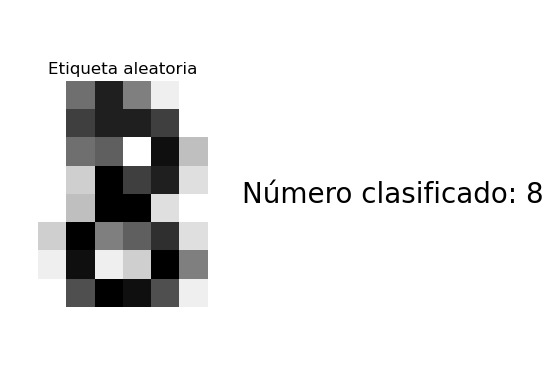

In [8]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset "load_digits"
digits = load_digits()

# Obtener las imágenes y las etiquetas
X = digits.data
y = digits.target

# Entrenar un modelo SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X, y)

# Cargamos una etiqueta aleatoria
etiqueta_aleatoria = np.random.choice(y)

# Obtenemos una imagen a partir de la etiqueta aleatoria
indice_etiqueta = np.where(y == etiqueta_aleatoria)[0][0]
imagen_etiqueta = X[indice_etiqueta]

# Clasificar la imagen y obtener el número correspondiente
numero_clasificado = svm.predict([imagen_etiqueta])[0]

# Mostrar la etiqueta aleatoria y el número clasificado
fig, ax = plt.subplots(1, 2)
ax[0].imshow(imagen_etiqueta.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[0].axis('off')
ax[0].set_title(f'Etiqueta aleatoria')
ax[1].text(0.5, 0.5, f'Número clasificado: {numero_clasificado}', ha='center', va='center', fontsize=20)
ax[1].axis('off')
plt.show()
